# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt


Before I begin I am loading the various neccessary libraries in order to run the data analysis for the rest of this project

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')


Here I've loaded the 5 datasets (calls, internet, messages, plans, and users) as dataframes to use in our analysis

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()
plans_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [4]:
# Print a sample of data for plans
plans_df.sample()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Here we have a sample taken from the plans dataframe. The sample and info information looks to have a couple of issues. 
The message_date column is listed as an object rather than a timestamp

## Fix data

In [5]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


We've changed the datatype for the message_date column to be a timestamp

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


It looks like this dataframe has some missing values in the churn_date column
Reg_date and churn_date should be converted to timestamp datatype


In [7]:
# Print a sample of data for users
users_df.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
399,1399,Leonila,Baird,24,"San Antonio-New Braunfels, TX MSA",2018-06-06,surf,NaN
253,1253,Sumiko,Dudley,28,"Cleveland-Elyria, OH MSA",2018-08-18,ultimate,NaN
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26
445,1445,Elodia,Donovan,71,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,ultimate,NaN
311,1311,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaN
391,1391,Errol,Cooke,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-11,ultimate,NaN
270,1270,Anjelica,Chan,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-18,ultimate,NaN
293,1293,Lanny,Nolan,23,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-13,surf,NaN
377,1377,Vallie,Conway,18,"Rochester, NY MSA",2018-03-27,surf,NaN
334,1334,Donovan,Horton,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-03-08,surf,NaN


This data sample supports the previous comment in that the churn_date data is missing values. It's not clear if this means that the users have in fact churned in 2018 (and we do not know exactly when) or that they are still users at Megaline (although this option seems more likely)
first_name and last_name columns should be converted to lowercase
city should be converted to lowercase

### Fix Data

In [8]:
users_df['churn_date'].fillna('0000-00-00', inplace=True)

In [9]:
users_df.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

### Enrich Data

In [10]:
users_df['reg_date']=pd.to_datetime(users_df['reg_date'], format = '%Y-%m-%d')



In [11]:
users_df['first_name']=users_df['first_name'].str.lower()

In [12]:
users_df['last_name']=users_df['last_name'].str.lower()

In [13]:
users_df['city']=users_df['city'].str.lower()

I've converted the reg_date to datetime
I've made the first_name, last_name and city columns lowercase
I cannot convert churn_date to timestamp due to some data being missing

In [14]:
users_df.sample(n=10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
320,1320,bert,wells,23,"los angeles-long beach-anaheim, ca msa",2018-02-23,surf,0000-00-00
222,1222,cleo,anderson,18,"los angeles-long beach-anaheim, ca msa",2018-06-27,surf,0000-00-00
359,1359,sherley,norris,33,"colorado springs, co msa",2018-02-08,surf,0000-00-00
356,1356,hae,ryan,46,"milwaukee-waukesha, wi msa",2018-05-16,surf,0000-00-00
380,1380,lajuana,kelley,35,"san jose-sunnyvale-santa clara, ca msa",2018-09-04,ultimate,0000-00-00
261,1261,dusti,forbes,31,"kansas city, mo-ks msa",2018-02-22,surf,0000-00-00
436,1436,jennine,kinney,69,"philadelphia-camden-wilmington, pa-nj-de-md msa",2018-08-26,ultimate,0000-00-00
131,1131,shane,morrison,60,"los angeles-long beach-anaheim, ca msa",2018-01-07,surf,0000-00-00
478,1478,elane,david,51,"portland-vancouver-hillsboro, or-wa msa",2018-06-28,ultimate,0000-00-00
207,1207,samuel,porter,63,"omaha-council bluffs, ne-ia msa",2018-12-22,surf,0000-00-00


## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
calls_df.sample(n=10)


,id,user_id,call_date,duration
104768,1368_488,1368,2018-12-28,0.00
39719,1147_503,1147,2018-12-08,0.00
39825,1147_619,1147,2018-07-27,4.05
85556,1313_536,1313,2018-07-21,12.04
46031,1167_114,1167,2018-10-16,18.16
66178,1240_36,1240,2018-12-19,18.20
42817,1156_422,1156,2018-08-15,5.70
67172,1241_8,1241,2018-11-07,8.78
92468,1332_124,1332,2018-12-06,2.35
83709,1305_137,1305,2018-06-23,0.00


In [17]:
calls_df.duplicated().sum()

0

The data looks to be complete with no missing data or duplicated data.
Call_date will need to be converted to timestamp datatype

### Fix data

In [18]:
calls_df['cals_date']=pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d')

### Enrich data

## Messages

In [19]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Print a sample of data for messages
messages_df.sample(n=10)


,id,user_id,message_date
7416,1059_296,1059,2018-11-02
38298,1252_56,1252,2018-11-30
13811,1094_44,1094,2018-11-27
51989,1335_581,1335,2018-12-12
69023,1447_91,1447,2018-10-27
32963,1205_38,1205,2018-12-20
70146,1456_9,1456,2018-09-07
58044,1365_200,1365,2018-08-10
7756,1060_92,1060,2018-11-19
57434,1362_518,1362,2018-02-28


In [21]:
messages_df.duplicated().sum()

0

dataframe seems to have no missing or duplicated data
will need to convert message_date to timestamp

### Fix data

In [22]:
messages_df['message_date']= pd.to_datetime(messages_df['message_date'], format = '%Y-%m-%d')

## Internet

In [23]:
# Print the general/summary information about the internet DataFrame
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Print a sample of data for the internet traffic
internet_df.sample(n=10)


,id,user_id,session_date,mb_used
80136,1374_212,1374,2018-11-18,437.75
52741,1237_121,1237,2018-12-11,416.07
18012,1081_72,1081,2018-09-25,264.66
28668,1132_29,1132,2018-09-24,230.57
89544,1414_0,1414,2018-09-20,503.23
33248,1150_362,1150,2018-10-06,213.61
36502,1164_185,1164,2018-08-31,0.00
64842,1299_130,1299,2018-11-22,20.52
1453,1008_164,1008,2018-11-22,645.98
82516,1385_267,1385,2018-10-30,155.41


In [25]:
internet_df.duplicated().sum()

0

dataframe appears to have no missing or duplicated data
session_date will be converted to timestamp

### Fix data

In [26]:
internet_df['session_date']= pd.to_datetime(internet_df['session_date'], format = '%Y-%m-%d')

## Study plan conditions

In [27]:
# Print out the plan conditions and make sure they are clear for you
plans = {
    'surf': {'monthly_charge': 20, 'minutes_included': 500, 'messages_included': 50, 'gb_included': 15, 'usd_per_minute': 0.03, 'usd_per_message': 0.03, 'usd_per_gb': 10},
    'ultimate': {'monthly_charge': 70, 'minutes_included': 3000, 'messages_included': 1000, 'gb_included': 30, 'usd_per_minute': 0.01, 'usd_per_message': 0.01, 'usd_per_gb': 7}
}


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [28]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  object        
 3   duration   137735 non-null  float64       
 4   cals_date  137735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB


In [29]:
calls_df['month'] = calls_df['cals_date'].dt.to_period('M')

In [30]:
calls_df.groupby(['user_id', 'month']).size()

user_id  month  
1000     2018-12    16
1001     2018-08    27
         2018-09    49
         2018-10    65
         2018-11    64
                    ..
1498     2018-12    39
1499     2018-09    41
         2018-10    53
         2018-11    45
         2018-12    65
Length: 2258, dtype: int64

In [31]:
calls_per_month = calls_df.groupby(['user_id', 'month']).size().reset_index(name='call_count')

In [32]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month


,user_id,month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [33]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()


In [34]:
minutes_per_month['duration']=minutes_per_month['duration'].apply(np.ceil)
minutes_per_month

,user_id,month,duration
0,1000,2018-12,117.0
1,1001,2018-08,172.0
2,1001,2018-09,298.0
3,1001,2018-10,375.0
4,1001,2018-11,405.0
...,...,...,...
2253,1498,2018-12,325.0
2254,1499,2018-09,331.0
2255,1499,2018-10,364.0
2256,1499,2018-11,289.0


In [35]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_df['month'] = messages_df['message_date'].dt.to_period('M')


In [36]:
messages_df

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018-12
76047,1497_536,1497,2018-12-24,2018-12
76048,1497_547,1497,2018-12-31,2018-12
76049,1497_558,1497,2018-12-24,2018-12


In [37]:
messages_per_month = messages_df.groupby(['user_id', 'month'])['id'].size().reset_index(name='messages')

In [38]:
messages_per_month

,user_id,month,messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [39]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_df['month']= internet_df['session_date'].dt.to_period('M')


In [40]:
internet_df

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018-10
104821,1499_216,1499,2018-12-30,304.72,2018-12
104822,1499_217,1499,2018-09-22,292.75,2018-09
104823,1499_218,1499,2018-12-07,0.00,2018-12


In [41]:
internet_use_per_month = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

In [42]:
internet_use_per_month['mb_used']= internet_use_per_month['mb_used'].apply(np.ceil)
internet_use_per_month

,user_id,month,mb_used
0,1000,2018-12,1902.0
1,1001,2018-08,6920.0
2,1001,2018-09,13315.0
3,1001,2018-10,22331.0
4,1001,2018-11,18505.0
...,...,...,...
2272,1498,2018-12,23138.0
2273,1499,2018-09,12985.0
2274,1499,2018-10,19493.0
2275,1499,2018-11,16814.0


In [43]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
calls_minutes_merged = pd.merge(calls_per_month, minutes_per_month, on = ['user_id', 'month'], how = 'outer')
 

merged calls_per_month datafram with minutes per month datafram

In [44]:
calls_minutes_messages_merged = pd.merge(calls_minutes_merged, messages_per_month, on=['user_id', 'month'], how='outer')

merged new dataframe with messages per month dataframe

In [45]:
all_data_merged = pd.merge(calls_minutes_messages_merged, internet_use_per_month, on=['user_id', 'month'], how='outer')
all_data_merged

,user_id,month,call_count,duration,messages,mb_used
0,1000,2018-12,16.0,117.0,11.0,1902.0
1,1001,2018-08,27.0,172.0,30.0,6920.0
2,1001,2018-09,49.0,298.0,44.0,13315.0
3,1001,2018-10,65.0,375.0,53.0,22331.0
4,1001,2018-11,64.0,405.0,36.0,18505.0
...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13040.0
2289,1361,2018-05,NaN,NaN,2.0,1520.0
2290,1482,2018-10,NaN,NaN,2.0,NaN
2291,1108,2018-12,NaN,NaN,NaN,234.0


Merged dataframes calls_df and messages_df into one data from on user_id and month columns

In [46]:
# Add the plan information
user_plan_data_monthly = pd.merge(all_data_merged, users_df[['user_id', 'plan', 'city']], on='user_id', how='left')
user_plan_data_monthly

,user_id,month,call_count,duration,messages,mb_used,plan,city
0,1000,2018-12,16.0,117.0,11.0,1902.0,ultimate,"atlanta-sandy springs-roswell, ga msa"
1,1001,2018-08,27.0,172.0,30.0,6920.0,surf,"seattle-tacoma-bellevue, wa msa"
2,1001,2018-09,49.0,298.0,44.0,13315.0,surf,"seattle-tacoma-bellevue, wa msa"
3,1001,2018-10,65.0,375.0,53.0,22331.0,surf,"seattle-tacoma-bellevue, wa msa"
4,1001,2018-11,64.0,405.0,36.0,18505.0,surf,"seattle-tacoma-bellevue, wa msa"
...,...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13040.0,surf,"boston-cambridge-newton, ma-nh msa"
2289,1361,2018-05,NaN,NaN,2.0,1520.0,surf,"birmingham-hoover, al msa"
2290,1482,2018-10,NaN,NaN,2.0,NaN,ultimate,"new york-newark-jersey city, ny-nj-pa msa"
2291,1108,2018-12,NaN,NaN,NaN,234.0,ultimate,"salt lake city, ut msa"


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [47]:
# Calculate the monthly revenue for each user
plans = {
    'surf': {'monthly_charge': 20, 'minutes_included': 500, 'messages_included': 50, 'gb_included': 15, 'usd_per_minute': 0.03, 'usd_per_message': 0.03, 'usd_per_gb': 10},
    'ultimate': {'monthly_charge': 70, 'minutes_included': 3000, 'messages_included': 1000, 'gb_included': 30, 'usd_per_minute': 0.01, 'usd_per_message': 0.01, 'usd_per_gb': 7}
}

In [48]:
def calculate_revenue(row, plans):

    duration = row['duration'] / 60
    messages = row['messages']
    gb_used = row['mb_used'] / 1024
    plan = row['plan']
    

    plan_info = plans[plan]
    monthly_charge = plan_info['monthly_charge']
    minutes_included = plan_info['minutes_included']
    messages_included = plan_info['messages_included']
    gb_included = plan_info['gb_included']
    
 
    extra_minutes = max(0, duration - minutes_included)
    extra_messages = max(0, messages - messages_included)
    extra_gb = max(0, gb_used - gb_included)
    
 
    extra_minutes_charge = extra_minutes * plan_info['usd_per_minute']
    extra_messages_charge = extra_messages * plan_info['usd_per_message']
    extra_gb_charge = extra_gb * plan_info['usd_per_gb']
    
 
    total_charge = monthly_charge + extra_minutes_charge + extra_messages_charge + extra_gb_charge
    
    return total_charge


user_plan_data_monthly['monthly_revenue'] = user_plan_data_monthly.apply(lambda row: calculate_revenue(row, plans), axis=1)

In [49]:
user_plan_data_monthly.sort_values(by='user_id', ascending=True)

,user_id,month,call_count,duration,messages,mb_used,plan,city,monthly_revenue
0,1000,2018-12,16.0,117.0,11.0,1902.0,ultimate,"atlanta-sandy springs-roswell, ga msa",70.000000
1,1001,2018-08,27.0,172.0,30.0,6920.0,surf,"seattle-tacoma-bellevue, wa msa",20.000000
2,1001,2018-09,49.0,298.0,44.0,13315.0,surf,"seattle-tacoma-bellevue, wa msa",20.000000
3,1001,2018-10,65.0,375.0,53.0,22331.0,surf,"seattle-tacoma-bellevue, wa msa",88.166172
4,1001,2018-11,64.0,405.0,36.0,18505.0,surf,"seattle-tacoma-bellevue, wa msa",50.712891
...,...,...,...,...,...,...,...,...,...
2253,1498,2018-12,39.0,325.0,NaN,23138.0,surf,"new york-newark-jersey city, ny-nj-pa msa",95.957031
2257,1499,2018-12,65.0,469.0,NaN,22060.0,surf,"orlando-kissimmee-sanford, fl msa",85.429688
2256,1499,2018-11,45.0,289.0,NaN,16814.0,surf,"orlando-kissimmee-sanford, fl msa",34.199219
2255,1499,2018-10,53.0,364.0,NaN,19493.0,surf,"orlando-kissimmee-sanford, fl msa",60.361328


## Study user behaviour

### Calls

In [50]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls_grouped = user_plan_data_monthly.groupby(['plan', 'month'])['duration'].mean().reset_index()


In [51]:
pivot_calls_grouped = calls_grouped.pivot(index = 'month', columns= 'plan', values = 'duration')
pivot_calls_grouped

plan,surf,ultimate
month,,
2018-01,193.000000,183.750000
2018-02,281.333333,443.833333
2018-03,311.434783,286.166667
2018-04,332.920000,317.095238
2018-05,387.600000,384.206897
2018-06,411.937500,365.933333
2018-07,428.541667,404.271186
2018-08,394.974843,397.788732
2018-09,397.602094,413.779070


<AxesSubplot:title={'center':'Average Call Duration per Plan'}, xlabel='Month', ylabel='Avg Call Duration'>

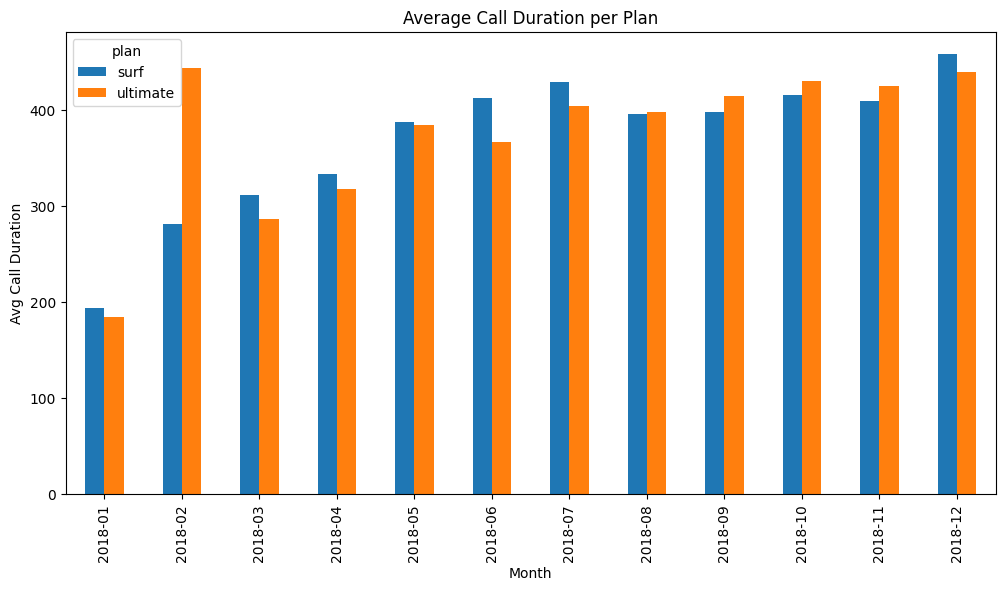

In [52]:
pivot_calls_grouped.plot(kind='bar', figsize=(12,6), title='Average Call Duration per Plan', xlabel='Month', ylabel = 'Avg Call Duration')

In [53]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'surf']['duration']
ultimate_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'ultimate']['duration']



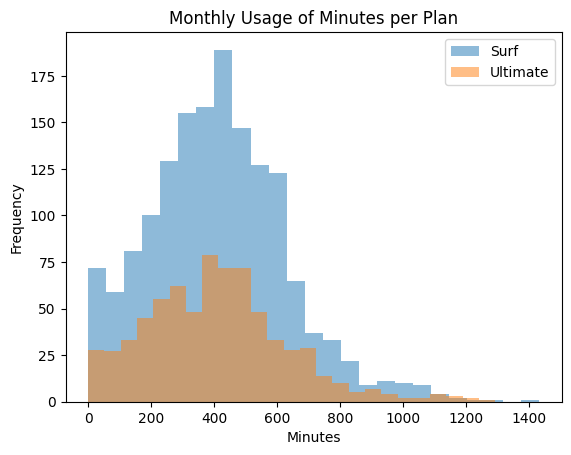

In [54]:
plt.hist(surf_data, bins=25, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=25, alpha=0.5, label='Ultimate')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Monthly Usage of Minutes per Plan')
plt.legend(loc='upper right')
plt.show()

It looks like the usage of minutes is higher for the surf data by a significant amount althought the distribution accross the two plans seems to be similar.

In [55]:
# Calculate the mean and the variance of the monthly call duration
mean_duration_per_plan = user_plan_data_monthly.groupby('plan')['duration'].mean().reset_index()
mean_duration_per_plan

,plan,duration
0,surf,412.594822
1,ultimate,410.701262


In [56]:
variance_duration_per_plan = user_plan_data_monthly.groupby('plan')['duration'].var().reset_index()

In [57]:
variance_duration_per_plan

,plan,duration
0,surf,47003.004118
1,ultimate,50517.268776


<Figure size 1200x600 with 0 Axes>

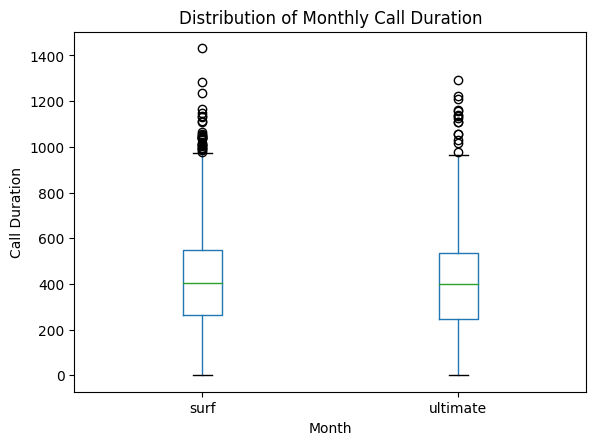

In [58]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(12, 6))
boxplot = user_plan_data_monthly.boxplot(column='duration', by='plan', grid=False)

plt.title('Distribution of Monthly Call Duration')
plt.suptitle('')  
plt.xlabel('Month')
plt.ylabel('Call Duration')
plt.show()


As we saw in the histogram, the distribution of call duration is almost identical for the two plans.

### Messages

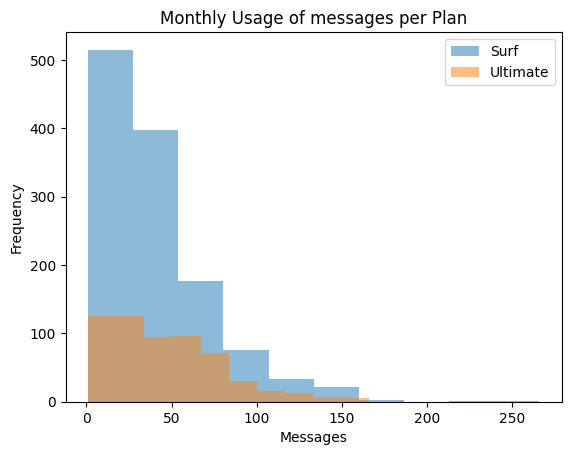

In [59]:
# Compare the number of messages users of each plan tend to send each month

surf_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'surf']['messages']
ultimate_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'ultimate']['messages']

plt.hist(surf_data, bins=10, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=10, alpha=0.5, label='Ultimate')
plt.xlabel('Messages')
plt.ylabel('Frequency')
plt.title('Monthly Usage of messages per Plan')
plt.legend(loc='upper right')
plt.show()

Like the call duration histogram, the monthly average messages sent for each plan shows that the surf plan users have higher usage but the two dataframes mirror each other in distribution

In [60]:
mean_messages_per_plan =  user_plan_data_monthly.groupby('plan')['messages'].mean().reset_index()
mean_messages_per_plan



,plan,messages
0,surf,40.109656
1,ultimate,46.296233


In [61]:
variance_messages_per_plan = user_plan_data_monthly.groupby('plan')['messages'].var().reset_index()
variance_messages_per_plan

,plan,messages
0,surf,1091.344231
1,ultimate,1085.183108


Surf plan users send more messages per month although the distribution of the plans appear similar.

### Internet

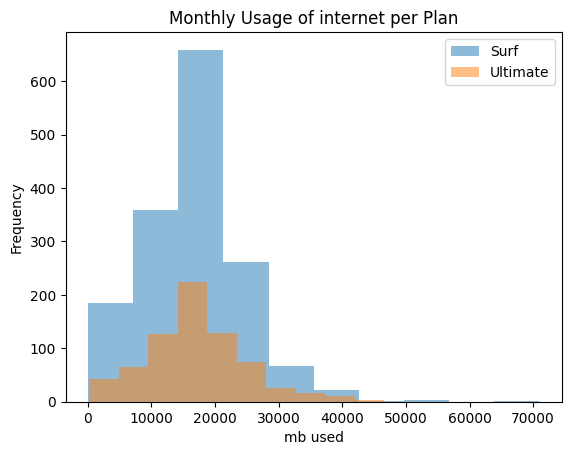

In [62]:
# Compare the amount of internet traffic consumed by users per plan

surf_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'surf']['mb_used']
ultimate_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'ultimate']['mb_used']

plt.hist(surf_data, bins=10, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=10, alpha=0.5, label='Ultimate')
plt.xlabel('mb used')
plt.ylabel('Frequency')
plt.title('Monthly Usage of internet per Plan')
plt.legend(loc='upper right')
plt.show()

In [64]:
mean_mb_per_plan = user_plan_data_monthly.groupby('plan')['mb_used'].mean().reset_index()
mean_duration_per_plan

,plan,duration
0,surf,412.594822
1,ultimate,410.701262


In [65]:
variance_internet_per_plan =  user_plan_data_monthly.groupby('plan')['mb_used'].var().reset_index()
variance_internet_per_plan

,plan,mb_used
0,surf,6.216812e+07
1,ultimate,6.132465e+07


A pattern is emerging with our data. For internet use, the surf plan users have a higher frequency of usage but the distribution of the data for both plans is similar.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [ ]:
surf_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'surf']['monthly_revenue']
ultimate_data = user_plan_data_monthly[user_plan_data_monthly['plan'] == 'ultimate']['monthly_revenue']

plt.hist(surf_data, bins=25, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=25, alpha=0.5, label='Ultimate')
plt.xlabel('monthly_revenue')
plt.ylabel('Frequency')
plt.title('Monthly Usage of internet per Plan')
plt.legend(loc='upper right')
plt.show()

In [ ]:
mean_rev_per_plan = user_plan_data_monthly.groupby('plan')['monthly_revenue'].mean().reset_index()
mean_rev_per_plan

In [ ]:
variance_rev_per_plan = user_plan_data_monthly.groupby('plan')['monthly_revenue'].var().reset_index()
variance_rev_per_plan

It is much more likely for users of the surf plan to exceed their plan allowances which leads to more variety in the revenue generated from their plans. On average, the surf plan still produces less revenue than the ultimate by an average of about $17/user/month.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

The null hypothesis is: The average revenue of users from the ultimate plan is the same as the average revenue for the surf plan

In [ ]:
# Test the hypotheses
alpha = 0.05

results = st.ttest_ind(surf_data, ultimate_data, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


pvalue is very low. This tells us that there is a negliable chance that the mean value is the same. We reject our hypothesis that the mean is the same

Null Hypothesis: The average revenue in NY and NJ is the same as the average revenue for the rest of the country

In [ ]:
# Test the hypotheses
user_plan_data_monthly['city'].str.contains('ny|nj')


ny_nj_data = user_plan_data_monthly[user_plan_data_monthly['city'].str.contains('ny|nj')]['monthly_revenue']
rest_data = user_plan_data_monthly[~user_plan_data_monthly['city'].str.contains('ny|nj')]['monthly_revenue']

alpha = 0.05

results = st.ttest_ind(ny_nj_data, rest_data, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

The pvalue is about our alpha target which tells us that we cannot reject our original hypothesis and that we can assume NY and NJ monthly average revenue is reflective of the rest of the country.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

With this project the goal was to take data from 5 datasets conscerning customer behavior for Megaline's offerings. There are 2 plans that users in 2018 could purchase: 1. Surf and, 2. Ultimate. 

For each plan, we calculated the usage of call minutes, text messages sent, internet used, and overall revenue generate for each plan per month and are able to draw the following conclusions:

1. The surf plan has a higher usage overall across all behaviors
2. The users of the surf plan are more likely to exceed their month allowances of calls, texts, and internet
3. The Ulimate plan generates more income per user on average

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Now your project is a true "A". Congratulations! 
    
I'm glad to say that your project has been accepted and you can go to the next sprint. 
</div>